In [1]:
import sys, os
import pandas as pd
import geopandas as gpd
import xarray as xr
import time
import multiprocessing
ncpus = multiprocessing.cpu_count()

from datacube_stats.statistics import GeoMedian
from datacube.helpers import ga_pq_fuser
from datacube.storage import masking
from datacube.helpers import write_geotiff

#get the DEA version of the plotting functions
sys.path.append(os.path.abspath('/g/data/r78/DPIPWE_lm/dea-notebooks/10_Scripts'))
import DEAPlotting
import DEADataHandling


import datacube
dc = datacube.Datacube(app='load_sent_month_geomedian')

In [2]:
outputdir = '/g/data/r78/DPIPWE_lm/test_burn_mapping/output_data'
if not os.path.exists(outputdir):
    print("output directory doesn't exist")
    exit()

subset = True
label = None
albers = gpd.read_file('/g/data/r78/DPIPWE_lm/test_burn_mapping/reference_data/Albers_Australia_Coast_Islands_Reefs.shp')

if len(sys.argv)==2:
    label = sys.argv[1]
elif len(sys.argv)==3:
    label = "{},{}".format(sys.argv[1], sys.argv[2])

if label:
    index = albers[albers['label']==label].index[0]
    x = (albers.loc[index]['X_MIN'], albers.loc[index]['X_MAX'])
    y = (albers.loc[index]['Y_MIN'], albers.loc[index]['Y_MAX'])
    output_filename = outputdir + '/sentgm_month_masked_2016_'+'_'.join(label.split(','))+'.nc'
    print("Working on tile {}...".format(label))
else:
    x, y = (1385000.0, 1375000.0), (-4570000.0, -4580000.0)
    if subset:
        output_filename = 'sentgm_month_xxxx_test_subset.nc'
    else:
        output_filename = 'sentgm_month_xxxx_test_one.nc'

if os.path.exists(output_filename):
    print("output file already exists.")
    exit()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [4]:
label

'-f,/home/554/lm4502/.local/share/jupyter/runtime/kernel-9792acaa-ac4f-40a9-8a8b-02d076a7912e.json'

In [4]:
outputdir = '/g/data/r78/DPIPWE_lm/test_burn_mapping/output_data'
if not os.path.exists(outputdir):
    print("output directory doesn't exist")
    exit()

subset = True
label = None
albers = gpd.read_file('/g/data/r78/DPIPWE_lm/test_burn_mapping/reference_data/Albers_Australia_Coast_Islands_Reefs.shp')

#if len(sys.argv)==2:
#    label = sys.argv[1]
#elif len(sys.argv)==3:
#    label = "{},{}".format(sys.argv[1], sys.argv[2])

if label:
    index = albers[albers['label']==label].index[0]
    x = (albers.loc[index]['X_MIN'], albers.loc[index]['X_MAX'])
    y = (albers.loc[index]['Y_MIN'], albers.loc[index]['Y_MAX'])
    output_filename = outputdir + '/sentgm_month_masked_2016_'+'_'.join(label.split(','))+'.nc'
    print("Working on tile {}...".format(label))
else:
    x, y = (1385000.0, 1375000.0), (-4570000.0, -4580000.0)
    if subset:
        output_filename = 'sentgm_month_xxxx_test_subset.nc'
    else:
        output_filename = 'sentgm_month_xxxx_test_one.nc'

if os.path.exists(output_filename):
    print("output file already exists.")
    exit()

In [5]:
time = ('2017-03-01', '2017-04-30')
resolution = (-20, 20)
bands = ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir_1']

In [34]:
'''
x, y = (1300000.0, 1350000.0), (-4750000.0, -4800000.0)
#x, y = (1545320.07, 1551626.18), (-3955539.80, -3963119.79)
#product = 'nbart' #can be 'nbar', 'nbart' or 'fc'. Defaults to 'nbart'
time = ('2017-03-01', '2017-04-30')
bands = ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir_1',]
resolution = (-20,20)

query = {
        'x': x,
        'y': y,
        #'lat': (-35.27, -35.33),
        #'lon': (149.07, 149.15),
        'crs': 'EPSG:3577',
        'output_crs': 'EPSG:3577',
        'resolution': resolution, #(-20, 20),
        'time': time #('2017-01-01', '2017-02-01')
        }

#canberra_cm = dc.load(product='s2a_ard_granule', group_by='solar_day', **query)

canberra_cm = DEADataHandling.load_clearsentinel2(dc=dc, query=query,
                                                  masked_prop=0,
                                                  bands_of_interest = bands,
                                                  mask_pixel_quality=True) 
'''

"\nx, y = (1300000.0, 1350000.0), (-4750000.0, -4800000.0)\n#x, y = (1545320.07, 1551626.18), (-3955539.80, -3963119.79)\n#product = 'nbart' #can be 'nbar', 'nbart' or 'fc'. Defaults to 'nbart'\ntime = ('2017-03-01', '2017-04-30')\nbands = ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir_1',]\nresolution = (-20,20)\n\nquery = {\n        'x': x,\n        'y': y,\n        #'lat': (-35.27, -35.33),\n        #'lon': (149.07, 149.15),\n        'crs': 'EPSG:3577',\n        'output_crs': 'EPSG:3577',\n        'resolution': resolution, #(-20, 20),\n        'time': time #('2017-01-01', '2017-02-01')\n        }\n\n#canberra_cm = dc.load(product='s2a_ard_granule', group_by='solar_day', **query)\n\ncanberra_cm = DEADataHandling.load_clearsentinel2(dc=dc, query=query,\n                                                  masked_prop=0,\n                                                  bands_of_interest = bands,\n                                                  mask_pixel_quality=True) \n"

In [6]:
x, y

((1385000.0, 1375000.0), (-4570000.0, -4580000.0))

In [7]:
def is_cm(month):
    return (month >= 11) | (month <= 4)

def multi_sentgm(x,y):
    query = {
            'x': x,
            'y': y,
            #'lat': (-35.27, -35.33),
            #'lon': (149.07, 149.15),
            'crs': 'EPSG:3577',
            'output_crs': 'EPSG:3577',
            'resolution': resolution,
            'time': time
            }

    ds_sent = DEADataHandling.load_clearsentinel2(dc=dc, query=query,
                                                masked_prop=0,
                                                bands_of_interest = bands)
                                                #mask_pixel_quality=True)

    # extract just the months of interest
    sent_cm = ds_sent.sel(time=is_cm(ds_sent['time.month']))


    #compute geomedian
    dss_gm = GeoMedian().compute(sent_cm)
    return dss_gm.copy()

In [8]:
xm, ym = (x[0]+x[1])/2, (y[0]+y[1])/2
x1, x2 = (x[0], xm), (xm, x[1])
y1, y2 = (y[0], ym), (ym, y[1])
if subset:
    out1 = multi_sentgm(x1, y)
    out2 = multi_sentgm(x2, y)
    out = xr.concat([out1, out2], dim='x')
else:
    out = multi_sentgm(x, y)

Loading s2a pixel quality
    Loading 3 filtered s2a timesteps
Loading s2b pixel quality
    Skipping s2b; no valid data for query
Combining and sorting s2a data
    Replacing invalid -999 values with NaN (data will be coerced to float64)
Loading s2a pixel quality
    Loading 3 filtered s2a timesteps
Loading s2b pixel quality
    Skipping s2b; no valid data for query
Combining and sorting s2a data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


In [28]:
DEAPlotting.three_band_image(sent_cm, bands = ['nbart_red', 'nbart_green', 'nbart_blue'], time = 0, contrast_enhance=True);

NameError: name 'sent_cm' is not defined

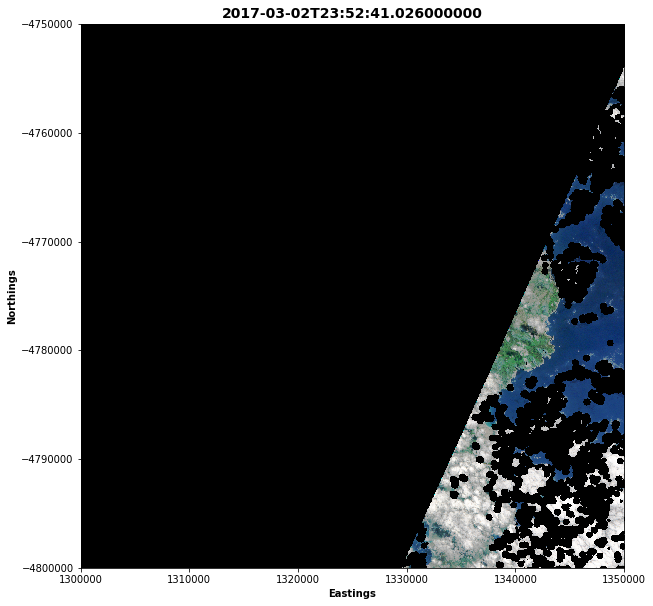

In [29]:
DEAPlotting.three_band_image(canberra_cm, bands = ['nbart_red', 'nbart_green', 'nbart_blue'], contrast_enhance=True);